In [29]:
import torch
import pickle
from torchvision.models import resnet50
# from MaskFormer.mask_former.mask_former_model import MaskFormer
import os
import matplotlib.pyplot as plt
import cv2
import torchvision.models as models
from torch.autograd import Variable as V
from torchvision import transforms
from torch.nn import functional as F
from PIL import Image
from torch import nn

In [37]:
# with open("/Volumes/exfat/bike_svi/data/external/R-50.pkl", 'rb') as f:
#         obj = f.read()
# model = pickle.loads(obj, encoding='latin1')['model'].items()

with open("/Volumes/exfat/bike_svi/data/external/model_final_f3fc73.pkl", 'rb') as f:
        obj = f.read()
obj = pickle.loads(obj, encoding='latin1')
arch = 'resnet50'
model = models.segmentation.fcn_resnet50(num_classes=66)
# checkpoint = torch.load(obj, map_location=torch.device("cpu"))
# state_dict = {k: v for k,v in checkpoint['state_dict'].items()}
model.load_state_dict(obj, strict = False)
model.eval()


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [38]:
# load the image transformer
centre_crop = transforms.Compose([
        transforms.ToTensor()
])


img = Image.open("/Volumes/exfat/bike_svi/data/raw/cities/London/gsv/image/perspective/5e27RTb-Ti3dEDFPsys45w_Direction_180_FOV_90_aspect_9--16_raw.png")
input_img = V(centre_crop(img).unsqueeze(0))

# forward pass
outputs = model(input_img)["out"]
logits = outputs.cpu()
# upsampled_logits = nn.functional.interpolate(logits,
#                     size=img.size, # (height, width)
#                     mode='bilinear',
#                     align_corners=False)

# Second, apply argmax on the class dimension
seg = logits.argmax(dim=1)[0].numpy()
# save it to png
cv2.imwrite("/Users/koichiito/Desktop/test.png", seg)

True

In [33]:
outputs

OrderedDict([('out',
              tensor([[[[ 0.0846,  0.0846,  0.0846,  ...,  0.0111,  0.0111,  0.0111],
                        [ 0.0846,  0.0846,  0.0846,  ...,  0.0111,  0.0111,  0.0111],
                        [ 0.0846,  0.0846,  0.0846,  ...,  0.0111,  0.0111,  0.0111],
                        ...,
                        [ 0.0134,  0.0134,  0.0134,  ..., -0.0326, -0.0326, -0.0326],
                        [ 0.0134,  0.0134,  0.0134,  ..., -0.0326, -0.0326, -0.0326],
                        [ 0.0134,  0.0134,  0.0134,  ..., -0.0326, -0.0326, -0.0326]],
              
                       [[ 0.0199,  0.0199,  0.0199,  ...,  0.0218,  0.0218,  0.0218],
                        [ 0.0199,  0.0199,  0.0199,  ...,  0.0218,  0.0218,  0.0218],
                        [ 0.0199,  0.0199,  0.0199,  ...,  0.0218,  0.0218,  0.0218],
                        ...,
                        [ 0.0619,  0.0619,  0.0619,  ...,  0.2045,  0.2045,  0.2045],
                        [ 0.0619,  0.0619,  0

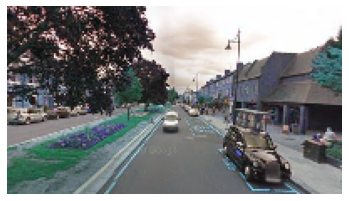

In [5]:
img = cv2.imread("/Volumes/exfat/bike_svi/data/raw/cities/London/gsv/image/perspective/5e27RTb-Ti3dEDFPsys45w_Direction_180_FOV_90_aspect_9--16_raw.png")
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
model(img)

TypeError: 'dict_items' object is not callable

In [3]:
import cv2
import matplotlib.pyplot as plt

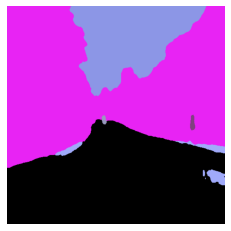

In [4]:
file = "/Volumes/exfat/bike_svi/data/interim/cities/London/segmented_color/z_V0RyjlKNBKd-A35TVJCA_Direction_0_FOV_90_aspect_9--16_raw.png"
img = cv2.imread(file)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.axis('off')
plt.show()